In [16]:
# Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display, HTML

sns.set("notebook", font_scale=1.05, rc={"figure.figsize": (10, 5)})
sns.set_style("ticks", rc={"figure.facecolor": "none", "axes.facecolor": "none"})
%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings("ignore")
plt.set_loglevel("WARNING")
mpl.rcParams["lines.markersize"] = 8

### Configurations

In [17]:
BASE_DIR = "/home/emerge/daphne/gpudrive/examples/experiments/eval/dataframes/"


# Test from local machine, trained on 80_000 scenarios
MODEL_1 = "model_PPO__R_80000__01_06_21_53_26_373_007223.csv"

# Good model
MODEL_3 = "model_PPO__R_1000__01_05_20_45_44_827_007000.csv"

# Test from cluster
MODEL_4 = "model_PPO__R_100__01_06_11_18_11_162_002000.csv"

In [18]:
# Load the data
df = pd.read_csv(f"{BASE_DIR}{MODEL_1}", index_col=0)
#df_test = pd.read_csv(f"{BASE_DIR}{RES_TEST}", index_col=0)

In [19]:
df

,scene,goal_achieved,collided,off_road,controlled_agents_in_scene,dataset,model_name,train_dataset_size
0,tfrecord-00000-of-01000_1,1.0,0.0,0.0,9,train,model_PPO__R_80000__01_06_21_53_26_373_007223,10000
1,tfrecord-00000-of-01000_100,1.0,0.0,0.0,4,train,model_PPO__R_80000__01_06_21_53_26_373_007223,10000
2,tfrecord-00000-of-01000_103,1.0,0.0,0.0,5,train,model_PPO__R_80000__01_06_21_53_26_373_007223,10000
3,tfrecord-00000-of-01000_11,1.0,0.0,0.0,3,train,model_PPO__R_80000__01_06_21_53_26_373_007223,10000
4,tfrecord-00000-of-01000_114,1.0,0.0,0.0,12,train,model_PPO__R_80000__01_06_21_53_26_373_007223,10000
...,...,...,...,...,...,...,...,...
9995,tfrecord-00054-of-00150_89,1.0,0.0,0.0,11,test,model_PPO__R_80000__01_06_21_53_26_373_007223,10000
9996,tfrecord-00060-of-00150_61,1.0,0.0,0.0,4,test,model_PPO__R_80000__01_06_21_53_26_373_007223,10000
9997,tfrecord-00068-of-00150_113,1.0,0.0,0.0,4,test,model_PPO__R_80000__01_06_21_53_26_373_007223,10000
9998,tfrecord-00006-of-00150_127,1.0,0.0,0.0,9,test,model_PPO__R_80000__01_06_21_53_26_373_007223,10000


### 1. Aggregate performance (todo)

- Aggregate performance train dataset
- Aggregate performance test dataset

In [20]:
df[df['dataset'] == 'train']

,scene,goal_achieved,collided,off_road,controlled_agents_in_scene,dataset,model_name,train_dataset_size
0,tfrecord-00000-of-01000_1,1.0,0.0,0.0,9,train,model_PPO__R_80000__01_06_21_53_26_373_007223,10000
1,tfrecord-00000-of-01000_100,1.0,0.0,0.0,4,train,model_PPO__R_80000__01_06_21_53_26_373_007223,10000
2,tfrecord-00000-of-01000_103,1.0,0.0,0.0,5,train,model_PPO__R_80000__01_06_21_53_26_373_007223,10000
3,tfrecord-00000-of-01000_11,1.0,0.0,0.0,3,train,model_PPO__R_80000__01_06_21_53_26_373_007223,10000
4,tfrecord-00000-of-01000_114,1.0,0.0,0.0,12,train,model_PPO__R_80000__01_06_21_53_26_373_007223,10000
...,...,...,...,...,...,...,...,...
9995,tfrecord-00122-of-01000_255,1.0,0.0,0.0,11,train,model_PPO__R_80000__01_06_21_53_26_373_007223,10000
9996,tfrecord-00122-of-01000_258,1.0,0.0,0.0,3,train,model_PPO__R_80000__01_06_21_53_26_373_007223,10000
9997,tfrecord-00122-of-01000_262,1.0,0.0,0.0,1,train,model_PPO__R_80000__01_06_21_53_26_373_007223,10000
9998,tfrecord-00122-of-01000_273,1.0,0.0,0.0,2,train,model_PPO__R_80000__01_06_21_53_26_373_007223,10000


In [21]:
df[df['dataset'] == 'train'].describe()

,goal_achieved,collided,off_road,controlled_agents_in_scene,train_dataset_size
count,9980.000000,9980.000000,9980.000000,10000.000000,10000.0
mean,0.974371,0.000478,0.003553,7.892100,10000.0
std,0.086598,0.011091,0.034188,7.017605,0.0
min,0.000000,0.000000,0.000000,0.000000,10000.0
25%,1.000000,0.000000,0.000000,3.000000,10000.0
50%,1.000000,0.000000,0.000000,6.000000,10000.0
75%,1.000000,0.000000,0.000000,10.000000,10000.0
max,1.000000,0.500000,1.000000,57.000000,10000.0


In [28]:
stats_df = df.groupby('dataset')[['goal_achieved', 'collided', 'off_road']].agg(['mean', 'std'])
stats_df = stats_df * 100  # Convert to percentages
stats_df = stats_df.round(3)  # Round to 3 decimal places

title = "<h3>Aggregate performance (%)</h3>"
display(HTML(title))  # Display the title
display(stats_df)  # Display the DataFrame

goal_achieved        collided        off_road       
                 mean    std     mean    std     mean    std
dataset                                                     
test           99.958  0.886    0.018  1.064    0.227  2.533
train          97.437  8.660    0.048  1.109    0.355  3.419

,scene,goal_achieved,collided,off_road,controlled_agents_in_scene,dataset,model_name,train_dataset_size
0,tfrecord-00000-of-01000_1,1.0,0.0,0.0,9,train,model_PPO__R_80000__01_06_21_53_26_373_007223,10000
1,tfrecord-00000-of-01000_100,1.0,0.0,0.0,4,train,model_PPO__R_80000__01_06_21_53_26_373_007223,10000
2,tfrecord-00000-of-01000_103,1.0,0.0,0.0,5,train,model_PPO__R_80000__01_06_21_53_26_373_007223,10000
3,tfrecord-00000-of-01000_11,1.0,0.0,0.0,3,train,model_PPO__R_80000__01_06_21_53_26_373_007223,10000
4,tfrecord-00000-of-01000_114,1.0,0.0,0.0,12,train,model_PPO__R_80000__01_06_21_53_26_373_007223,10000
...,...,...,...,...,...,...,...,...
9995,tfrecord-00054-of-00150_89,1.0,0.0,0.0,11,test,model_PPO__R_80000__01_06_21_53_26_373_007223,10000
9996,tfrecord-00060-of-00150_61,1.0,0.0,0.0,4,test,model_PPO__R_80000__01_06_21_53_26_373_007223,10000
9997,tfrecord-00068-of-00150_113,1.0,0.0,0.0,4,test,model_PPO__R_80000__01_06_21_53_26_373_007223,10000
9998,tfrecord-00006-of-00150_127,1.0,0.0,0.0,9,test,model_PPO__R_80000__01_06_21_53_26_373_007223,10000


In [10]:
#df[df['dataset'] == 'test']['goal_achieved']

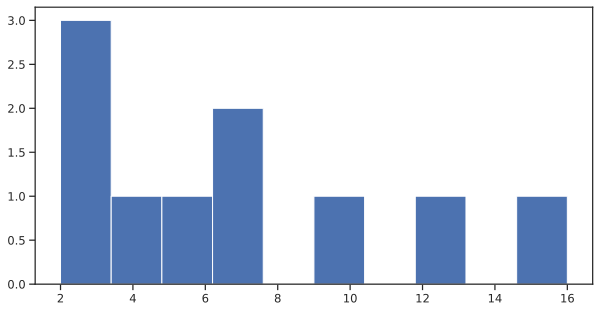

In [11]:
plt.hist(df[df['dataset'] == 'train']['controlled_agents_in_scene'].values);

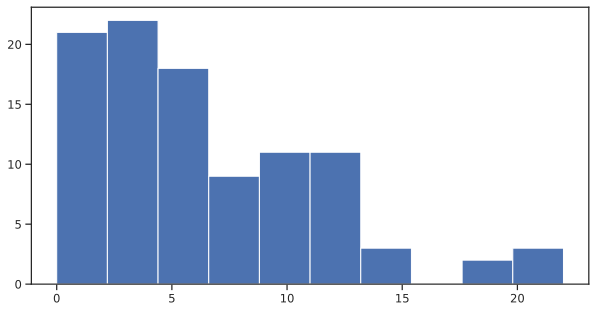

In [12]:
plt.hist(df[df['dataset'] == 'test']['controlled_agents_in_scene'].values);

### 2. Scaling laws (todo)

### 3. 